In [1]:
# Subtask 1: Creating a data model for the water cycle based on available data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from IPython.display import display, HTML

In [2]:
# Read Excel files
df_top = pd.read_excel("TOP_consumers_engine_2024.xlsx",header=None)
print(df_top.head())
print(df_top.columns)

df_water = pd.read_excel("Water_consumption_AH_2024.xlsx",header=None)
print(df_water.head())
print(df_top.columns)

                                0        1        2       3         4   \
0  Consumption for social purposes      NaN      NaN     NaN       NaN   
1                Engine production      NaN      NaN     NaN       NaN   
2                              NaN     2010     2011    2012      2013   
3                 Grand total (m3)  96569.0  94684.7  143781  163010.1   
4                              NaN      NaN      NaN     NaN       NaN   

         5        6        7        8        9      10       11       12  \
0       NaN      NaN      NaN      NaN      NaN    NaN      NaN      NaN   
1       NaN      NaN      NaN      NaN      NaN    NaN      NaN      NaN   
2      2014     2015     2016     2017     2018   2019     2020     2021   
3  132874.5  89328.8  63148.8  93381.2  77090.2  73667  59631.0  54098.0   
4       NaN      NaN      NaN      NaN      NaN    NaN      NaN      NaN   

        13         14       15  
0      NaN        NaN      NaN  
1      NaN        NaN      NaN  

In [3]:
print(df_top.info())
print(df_water.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     object 
 1   1       57 non-null     object 
 2   2       37 non-null     object 
 3   3       37 non-null     object 
 4   4       37 non-null     object 
 5   5       37 non-null     object 
 6   6       37 non-null     object 
 7   7       37 non-null     object 
 8   8       37 non-null     object 
 9   9       37 non-null     object 
 10  10      37 non-null     object 
 11  11      37 non-null     object 
 12  12      37 non-null     object 
 13  13      39 non-null     object 
 14  14      2 non-null      float64
 15  15      2 non-null      float64
dtypes: float64(2), object(14)
memory usage: 9.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  --

In [4]:
print(df_water.head(10))

                          0                1           2   \
0  Water measurement devices              NaN         NaN   
1         Identification Nr.  Production hall  Short name   
2                        NaN              NaN         NaN   
3                        NaN              NaN         NaN   
4                     8\nMB1              G19     Brunn 1   
5                     9\nMB2              G19     Brunn 2   
6                        MB3              G19   Brunn 1-2   
7                        NaN              G19         NaN   
8                        FB1              G95    Brunn  3   
9                        NaN              G95         NaN   

                                     3                 4         5   \
0                                   NaN               NaN       NaN   
1                        Measuring unit     Type of water  Diameter   
2                                   NaN               NaN       NaN   
3                          Water supply     

In [5]:
# Create the monthly column count and date series in the water consumption data.
start_col = 6  
num_months = df_water.shape[1] - start_col

dates = pd.date_range(start="2023-12-01", periods=num_months, freq="MS")

records = []

for i in range(4, df_water.shape[0]):   # traverse the data rows
    row = df_water.iloc[i]
    production_hall = row[1]
    short_name = row[2]
    unit = row[3]

    for idx, date in enumerate(dates):
        col_idx = start_col + idx
        if col_idx >= df_water.shape[1]:
            break
        value = row[col_idx]

        if pd.notna(value):
            try:
                records.append({
                    "Production_Hall": production_hall,
                    "Short_Name": short_name,
                    "Unit": unit,
                    "Year": date.year,
                    "Month": date.month,
                    "Consumption_m3": float(value)
                })
            except:
                continue

# A monthly detailed water consumption dataframe has been created.
df_detailed = pd.DataFrame(records)

print("\\Detailed measurement point data (first 10 rows):")
print(df_detailed.head(10))

\Detailed measurement point data (first 10 rows):
  Production_Hall Short_Name              Unit  Year  Month  Consumption_m3
0             G19    Brunn 1  1. Kút/\n1. well  2023     12          5160.1
1             G19    Brunn 1  1. Kút/\n1. well  2024      1          9003.5
2             G19    Brunn 1  1. Kút/\n1. well  2024      2         12273.8
3             G19    Brunn 1  1. Kút/\n1. well  2024      3         11457.6
4             G19    Brunn 1  1. Kút/\n1. well  2024      4         11810.7
5             G19    Brunn 1  1. Kút/\n1. well  2024      5         12028.5
6             G19    Brunn 1  1. Kút/\n1. well  2024      6         14322.0
7             G19    Brunn 1  1. Kút/\n1. well  2024      7         15939.0
8             G19    Brunn 1  1. Kút/\n1. well  2024      8         19017.9
9             G19    Brunn 1  1. Kút/\n1. well  2024      9         22424.6


In [6]:
# Subtask 2: Analyzing water consumption patterns (annual, monthly, seasonal, by hall)

# Annual total consumption
yearly = df_detailed.groupby("Year")["Consumption_m3"].sum().reset_index()
print(yearly)

# The top 5 points of highest consumption
top5 = df_detailed.groupby("Short_Name")["Consumption_m3"].sum().sort_values(ascending=False).head(5)
print(top5)


   Year  Consumption_m3
0  2023    1.799371e+07
1  2024    2.312972e+08
2  2025    4.787931e+06
Short_Name
Brunn 3, 4, 5    50316645.5
Spinkler 1       44411499.0
Brunn 4          20951607.6
Brunn  3         18725580.5
pince            12033695.3
Name: Consumption_m3, dtype: float64


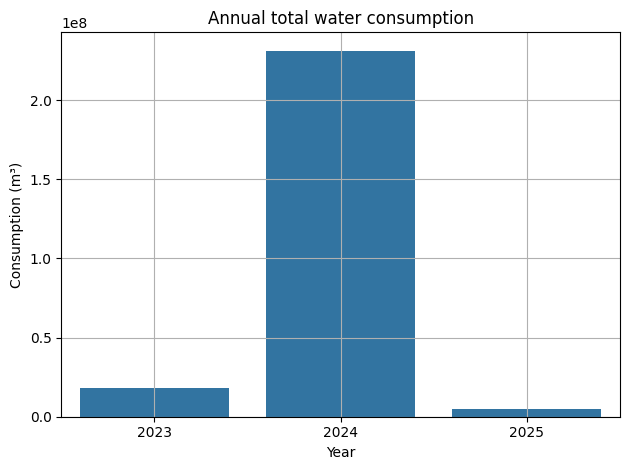

In [7]:
# Annual water consumption graph
sns.barplot(data=yearly, x="Year", y="Consumption_m3")
plt.title("Annual total water consumption")
plt.ylabel("Consumption (m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

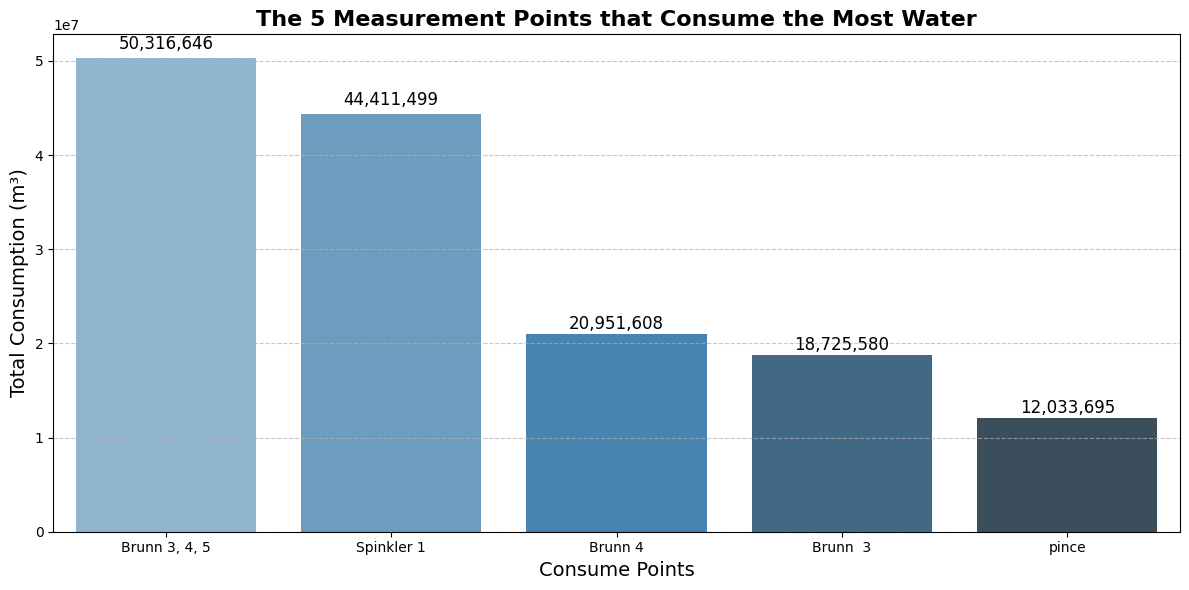

In [8]:
# Graph of the 5 points with the highest consumption
top5_df = top5.reset_index()
top5_df.columns = ['Short_Name', 'Total_Consumption']

plt.figure(figsize=(12,6))
sns.barplot(data=top5_df, x='Short_Name', y='Total_Consumption', hue='Short_Name', palette='Blues_d', legend=False)

plt.title("The 5 Measurement Points that Consume the Most Water", fontsize=16, weight='bold')
plt.xlabel("Consume Points", fontsize=14)
plt.ylabel("Total Consumption (m³)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, row in top5_df.iterrows():
    plt.text(index, row.Total_Consumption * 1.01, f'{row.Total_Consumption:,.0f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

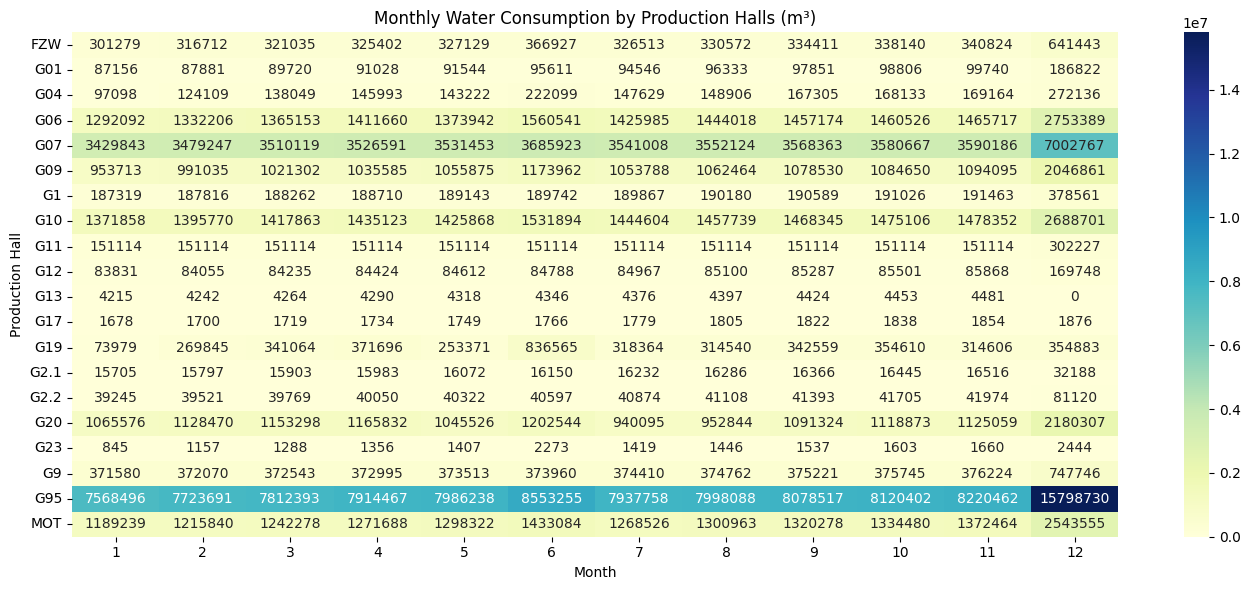

In [9]:
# Monthly water consumption heat map according to production halls
pivot_hall_month = df_detailed.pivot_table(
    index='Production_Hall',
    columns='Month',
    values='Consumption_m3',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(14,6))
sns.heatmap(pivot_hall_month, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Monthly Water Consumption by Production Halls (m³)")
plt.xlabel("Month")
plt.ylabel("Production Hall")
plt.tight_layout()
plt.show()


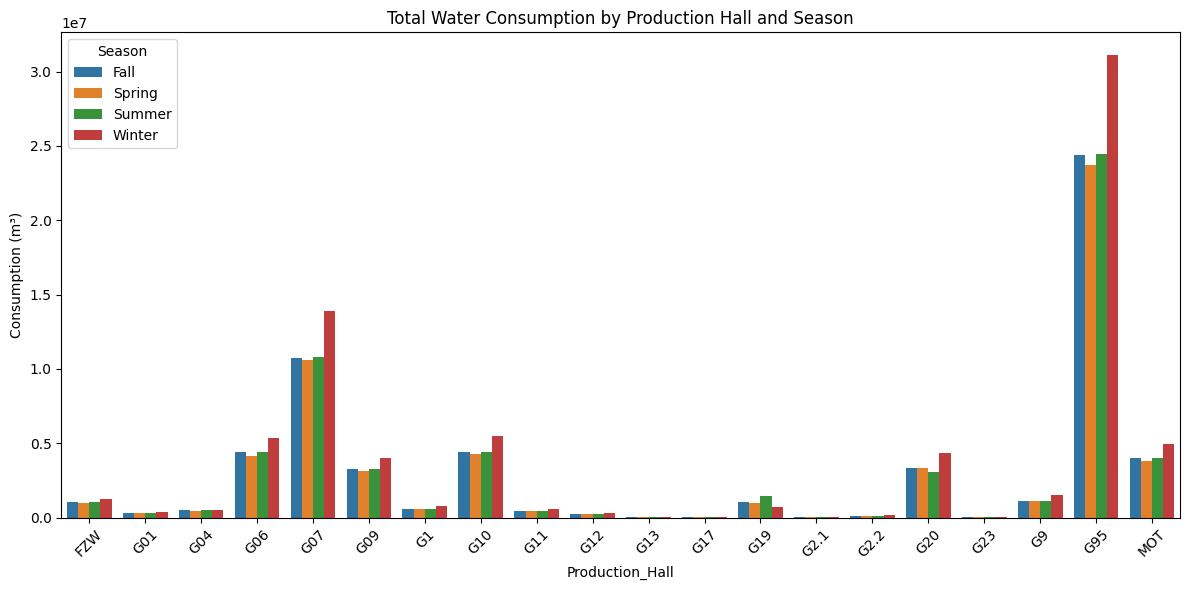

In [10]:
# Seasonal function and seasonal consumption analysis
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_detailed["Season"] = df_detailed["Month"].apply(get_season)

seasonal_hall = df_detailed.groupby(["Production_Hall", "Season"])["Consumption_m3"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=seasonal_hall, x='Production_Hall', y='Consumption_m3', hue='Season')
plt.title("Total Water Consumption by Production Hall and Season")
plt.xticks(rotation=45)
plt.ylabel("Consumption (m³)")
plt.tight_layout()
plt.show()

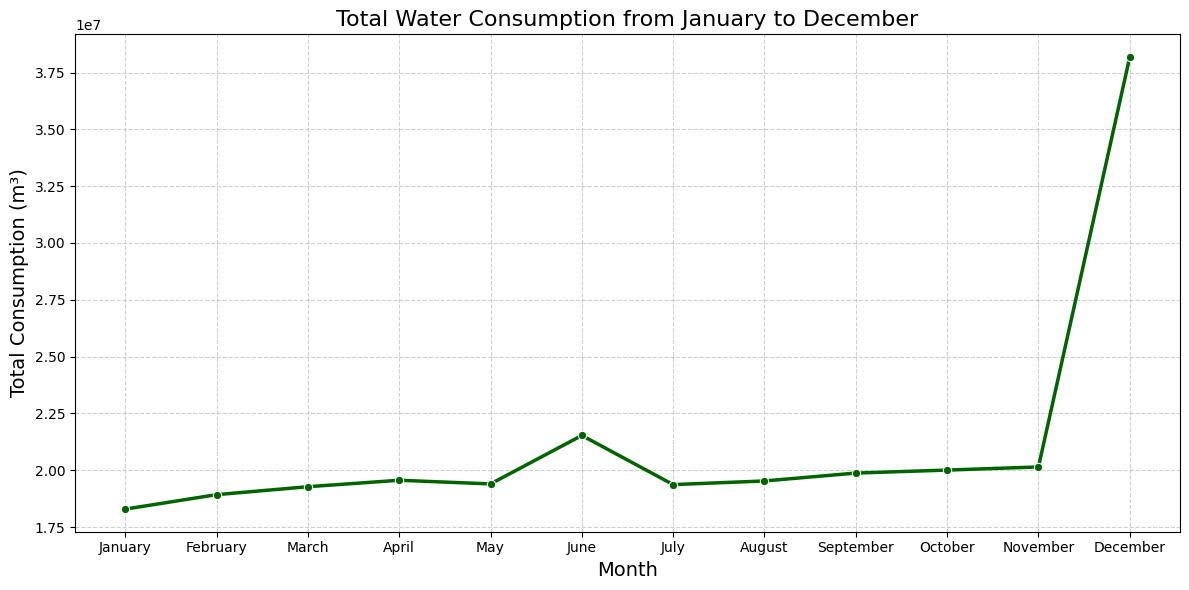

In [11]:
# Monthly total consumption line graph
aylar = ["January", "February", "March", "April", "May", "June",
         "July", "August", "September", "October", "November", "December"]

monthly = df_detailed.groupby("Month")["Consumption_m3"].sum().reindex(range(1,13)).reset_index()
monthly.columns = ["Month", "Consumption_m3"]
monthly["Month_Name"] = aylar  

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x="Month_Name", y="Consumption_m3", marker="o", linewidth=2.5, color="darkgreen")

plt.title("Total Water Consumption from January to December", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Consumption (m³)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [12]:
# Subtask 3: Developing WaterConsumptionModel class for encapsulated analysis
class WaterConsumptionModel:
    def __init__(self, data):
        self.data = data
        self.normalize_data()
        
    def normalize_data(self):
        self.data['Season'] = self.data['Month'].apply(self.get_season)
        
    def get_season(self, month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'
    
    def calculate_yearly_consumption(self):
        return self.data.groupby('Year')['Consumption_m3'].sum().reset_index()
    
    def calculate_monthly_consumption(self):
        monthly = self.data.groupby(['Year', 'Month'])['Consumption_m3'].sum().reset_index()
        monthly = monthly.sort_values(['Year', 'Month'])
        return monthly
    
    def top_consumers(self, n=5):
        return self.data.groupby('Short_Name')['Consumption_m3'].sum().nlargest(n).reset_index()
    
    def consumption_by_hall(self):
        return self.data.groupby('Production_Hall')['Consumption_m3'].sum().reset_index()
    
    def consumption_by_season(self):
        return self.data.groupby(['Production_Hall', 'Season'])['Consumption_m3'].sum().reset_index()
    
    def detect_anomalies(self, threshold=2):
        grouped = self.data.groupby(['Production_Hall', 'Short_Name'])
        mean = grouped['Consumption_m3'].transform('mean')
        std = grouped['Consumption_m3'].transform('std')
        self.data['Z_Score'] = (self.data['Consumption_m3'] - mean) / std
        
        anomalies = self.data[self.data['Z_Score'].abs() > threshold]
        return anomalies

# Start the model
water_model = WaterConsumptionModel(df_detailed)

print(df_detailed.columns)
print(df_detailed.head())


Index(['Production_Hall', 'Short_Name', 'Unit', 'Year', 'Month',
       'Consumption_m3', 'Season'],
      dtype='object')
  Production_Hall Short_Name              Unit  Year  Month  Consumption_m3  \
0             G19    Brunn 1  1. Kút/\n1. well  2023     12          5160.1   
1             G19    Brunn 1  1. Kút/\n1. well  2024      1          9003.5   
2             G19    Brunn 1  1. Kút/\n1. well  2024      2         12273.8   
3             G19    Brunn 1  1. Kút/\n1. well  2024      3         11457.6   
4             G19    Brunn 1  1. Kút/\n1. well  2024      4         11810.7   

   Season  
0  Winter  
1  Winter  
2  Winter  
3  Spring  
4  Spring  


XGBOOST WATER CONSUMPTION FORECAST MODEL 

Preparing data...
Data shape: (2091, 14)

Validating model...
Fold MAE: 384,965 m³
Fold MAE: 76,043 m³
Fold MAE: 15,616 m³
Average MAE: 158,875 m³

Predicting 2025...

Creating visualizations...


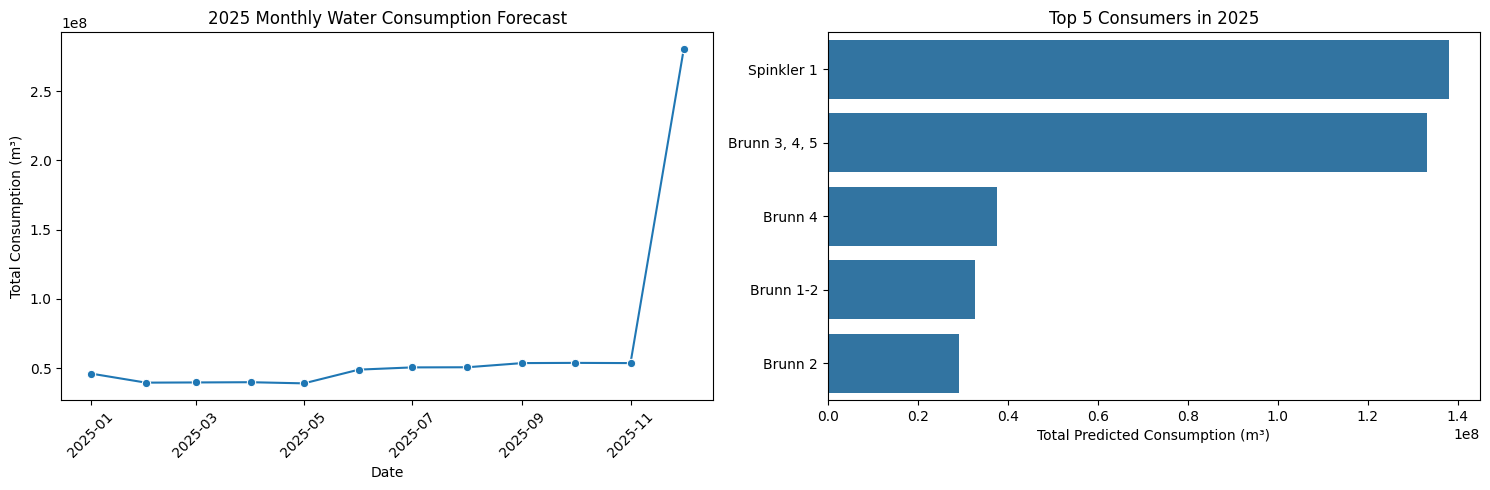


✅ 2025 Forecast Complete!


In [20]:
#WATER CONSUMPTION FORECAST MODEL (2025)
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# 1. DATA PREPARATION
def prepare_data(df):
    # Create datetime feature
    df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
    
    # Basic features
    df['Season'] = df['Month'] % 12 // 3 + 1
    
    # Encode categoricals
    le_hall = LabelEncoder()
    le_name = LabelEncoder()
    df['Hall_Encoded'] = le_hall.fit_transform(df['Production_Hall'])
    df['Name_Encoded'] = le_name.fit_transform(df['Short_Name'])
    
    # Lag features
    for lag in [1, 3, 6, 12]:
        df[f'Lag_{lag}'] = df.groupby(['Production_Hall', 'Short_Name'])['Consumption_m3'].shift(lag)
        df[f'Lag_{lag}'] = df[f'Lag_{lag}'].fillna(df['Consumption_m3'].median())
    
    return df.dropna(subset=['Consumption_m3']), le_hall, le_name

print("Preparing data...")
df_model, hall_encoder, name_encoder = prepare_data(df_detailed.copy())
print(f"Data shape: {df_model.shape}")

# 2. MODEL SETUP
features = ['Hall_Encoded', 'Name_Encoded', 'Season', 'Month'] + \
           [col for col in df_model if col.startswith('Lag_')]
X = df_model[features]
y = df_model['Consumption_m3']

# XGBoost model handles missing values natively
model = XGBRegressor(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

# 3. VALIDATION
print("\nValidating model...")
tscv = TimeSeriesSplit(3)
mae_scores = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    print(f"Fold MAE: {mae:,.0f} m³")

print(f"Average MAE: {np.mean(mae_scores):,.0f} m³")

# 4. 2025 PREDICTION
def predict_2025(model, historical_data, hall_encoder, name_encoder):
    predictions = []
    
    for month in range(1, 13):
        # Prepare features for each hall/name combination
        for hall in historical_data['Production_Hall'].unique():
            for name in historical_data['Short_Name'].unique():
                # Get historical patterns
                hall_data = historical_data[historical_data['Production_Hall'] == hall]
                name_data = hall_data[hall_data['Short_Name'] == name]
                
                # Create feature vector
                features = {
                    'Hall_Encoded': hall_encoder.transform([hall])[0],
                    'Name_Encoded': name_encoder.transform([name])[0],
                    'Season': (month % 12) // 3 + 1,
                    'Month': month,
                    'Lag_1': name_data['Consumption_m3'].iloc[-1] if len(name_data) > 0 else historical_data['Consumption_m3'].median(),
                    'Lag_3': name_data['Consumption_m3'].iloc[-3] if len(name_data) > 2 else historical_data['Consumption_m3'].median(),
                    'Lag_6': name_data['Consumption_m3'].iloc[-6] if len(name_data) > 5 else historical_data['Consumption_m3'].median(),
                    'Lag_12': name_data['Consumption_m3'].iloc[-12] if len(name_data) > 11 else historical_data['Consumption_m3'].median()
                }
                
                # Predict
                pred = model.predict(pd.DataFrame([features]))[0]
                
                predictions.append({
                    'Date': f"2025-{month:02d}-01",
                    'Production_Hall': hall,
                    'Short_Name': name,
                    'Predicted_Consumption': max(0, pred)
                })
    
    return pd.DataFrame(predictions)

print("\nPredicting 2025...")
predictions_2025 = predict_2025(model, df_model, hall_encoder, name_encoder)

# 5. VISUALIZATION
print("\nCreating visualizations...")
plt.figure(figsize=(15, 5))

# Total monthly consumption
monthly_total = predictions_2025.groupby('Date')['Predicted_Consumption'].sum().reset_index()
monthly_total['Date'] = pd.to_datetime(monthly_total['Date'])

plt.subplot(1, 2, 1)
sns.lineplot(data=monthly_total, x='Date', y='Predicted_Consumption', marker='o')
plt.title('2025 Monthly Water Consumption Forecast')
plt.xticks(rotation=45)
plt.ylabel('Total Consumption (m³)')

# Top 5 consumers
top_consumers = predictions_2025.groupby('Short_Name')['Predicted_Consumption'].sum().nlargest(5).reset_index()

plt.subplot(1, 2, 2)
sns.barplot(data=top_consumers, x='Predicted_Consumption', y='Short_Name')
plt.title('Top 5 Consumers in 2025')
plt.xlabel('Total Predicted Consumption (m³)')
plt.ylabel('')

plt.tight_layout()
plt.show()

print("\n 2025 Forecast Complete!")